# import Libraries

In [50]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Data Gathering

In [3]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Exploratory Data Anlysis and Feature Engineering

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

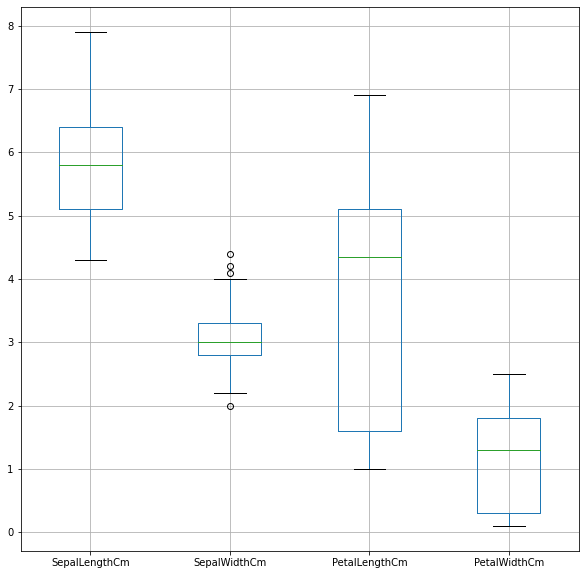

In [14]:
plt.figure(figsize = (10,10))
df1 = df.drop('Id',axis = 1)
df1.boxplot()

In [15]:
df['Id'].nunique()
df.drop('Id',axis = 1,inplace = True)

In [18]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
Missing_value_Ratio = (Number of missing values) / (Total Number rows)  * 100

In [21]:
(df.isna().sum() / df.shape[0]) * 100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [22]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [24]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Train Test Split

In [29]:
x = df.drop('Species',axis = 1)
y = df['Species']
# y

In [63]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=9)

In [64]:
x_train.shape

(120, 4)

In [66]:
y_train.value_counts()

2    42
1    41
0    37
Name: Species, dtype: int64

# Model Training

In [62]:
lr_clf = LogisticRegression(multi_class='ovr')
lr_clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

# Evaluation

In [47]:
y_pred = lr_clf.predict(x_test)
y_pred[10:15]

array([0, 1, 2, 2, 1], dtype=int64)

In [49]:
y_test[10:15]

28     0
54     1
125    2
116    2
93     1
Name: Species, dtype: int64

In [57]:
## Accuracy on Testing dataset

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is :\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print('Classification report is \n',clf_report)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test,y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of Model is:",accuracy)

Confusion Matrix is :
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

MultiLabel Confusion Matrix :
 [[[20  0]
  [ 0 10]]

 [[20  0]
  [ 0 10]]

 [[20  0]
  [ 0 10]]]
Accuracy of Model is: 1.0


In [67]:
## Accuracy on Training dataset

y_pred_train = lr_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix is :\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report is \n',clf_report)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train,y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy of Model is:",accuracy)

Confusion Matrix is :
 [[37  0  0]
 [ 0 35  6]
 [ 0  2 40]]
Classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.85      0.90        41
           2       0.87      0.95      0.91        42

    accuracy                           0.93       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.93      0.93       120

MultiLabel Confusion Matrix :
 [[[83  0]
  [ 0 37]]

 [[77  2]
  [ 6 35]]

 [[72  6]
  [ 2 40]]]
Accuracy of Model is: 0.9333333333333333


In [68]:
Predicted 
    0    1
0   TN   FP   Actual Values 
1   FN   TP

Predicted 
    0    1
0   75   5   Actual Values 
1   2   38

IndentationError: unexpected indent (<ipython-input-68-2ebf7c057ca1>, line 2)